In [1]:
#https://analyticsindiamag.com/complete-guide-to-bidirectional-lstm-with-python-codes/

In [9]:
#Importing the libraries 
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb 
import tensorflow as tf
from keras.preprocessing import sequence

In [10]:
n_unique_words = 10000 # cut texts after this number of words
maxlen = 200
batch_size = 128 

In [11]:
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=n_unique_words)

In [12]:
x_train.shape

(25000,)

In [13]:
y_train.shape

(25000,)

In [14]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
y_train = np.array(y_train)
y_test = np.array(y_test) 

In [16]:
x_train

array([[   5,   25,  100, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]])

In [17]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [19]:
#bi-LSTM layer
model = Sequential()
model.add(Embedding(n_unique_words, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
history=model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=12,
           validation_data=[x_test, y_test])
print(history.history['loss'])
print(history.history['accuracy']) 

Epoch 1/12
196/196 [==============================] - 301s 1s/step - loss: 0.4287 - accuracy: 0.7919 - val_loss: 0.3150 - val_accuracy: 0.8721
Epoch 2/12
196/196 [==============================] - 309s 2s/step - loss: 0.2332 - accuracy: 0.9123 - val_loss: 0.3059 - val_accuracy: 0.8697
Epoch 3/12
196/196 [==============================] - 297s 2s/step - loss: 0.1684 - accuracy: 0.9391 - val_loss: 0.3906 - val_accuracy: 0.8605
Epoch 4/12
196/196 [==============================] - 155s 790ms/step - loss: 0.1387 - accuracy: 0.9506 - val_loss: 0.4254 - val_accuracy: 0.8615
Epoch 5/12
196/196 [==============================] - 181s 927ms/step - loss: 0.1045 - accuracy: 0.9631 - val_loss: 0.4400 - val_accuracy: 0.8584
Epoch 6/12
196/196 [==============================] - 182s 929ms/step - loss: 0.1030 - accuracy: 0.9632 - val_loss: 0.5068 - val_accuracy: 0.8545
Epoch 7/12
196/196 [==============================] - 199s 1s/step - loss: 0.0718 - accuracy: 0.9776 - val_loss: 0.5926 - val_accurac

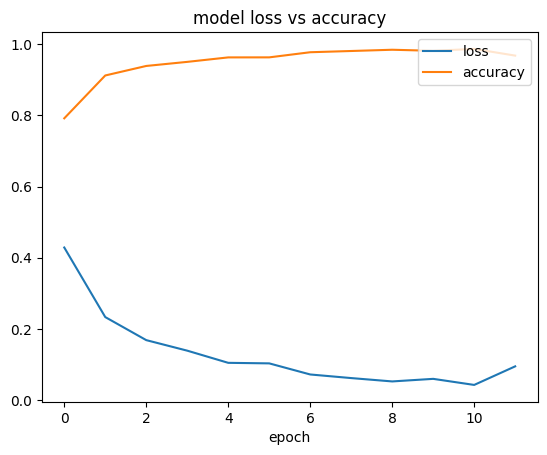

In [21]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('model loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show() 

In [22]:
#https://www.baeldung.com/cs/bidirectional-vs-unidirectional-lstm

In [ ]:
#https://towardsdatascience.com/lstm-and-bidirectional-lstm-for-regression-4fddf910c655